# Pandemic Patterns: A Comprehensive Analysis of Early COVID-19 Data (Jan-Jul 2020)

This project offers an exhaustive analysis of the initial phase of the COVID-19 pandemic, spanning from its emergence on January 22, 2020, until July 27, 2020. During these formative months, the world grappled with an unprecedented health crisis that rapidly evolved into a global emergency. The data scrutinized in this notebook encapsulates the key epidemiological metrics that define the pandemic's early trajectory: the spread of confirmed cases, the rise and fall of active cases, recovery rates, and the somber toll of fatalities. By delving into this period, we seek to understand the dynamics of the virus's propagation, the response efficiency of different nations, and the health outcomes resulting from the first wave of infections. Through methodical data analysis and visualization, we aim to uncover patterns that could inform future public health strategies and emergency preparedness plans.

#### Key questions:

1. Reflecting on the mortality rates between January and July 2020, what can be inferred about the healthcare system's efficacy in managing the pandemic across the top 20 affected countries?

2. Considering the recovery trends and the death-to-case ratio during the early months of the pandemic, what might be deduced about the severity of the disease and the success of clinical interventions in the most impacted nations?

3. How did the initial spread and peak of active COVID-19 cases vary between Poland and Germany, and what does this tell us about the early containment measures implemented by each country?

## Imports and Reading Data


In this section, we import necessary Python libraries for data manipulation, visualization, and analysis. Additionally, we load several COVID-19 datasets, including country-wise latest figures, day-wise global numbers, and detailed information for the USA.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from plotly.subplots import make_subplots  ## for creating subplots in plotly
import plotly.graph_objects as go

In [3]:
files = os.listdir(r'C:\Users\natgo\Desktop\Covid-19\Covid-19')
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [4]:
def read_data(path, filename):
    return pd.read_csv(path+'/'+filename)

In [5]:
path = r'C:\Users\natgo\Desktop\Covid-19\Covid-19'
world_data = read_data(path, 'worldometer_data.csv')

In [6]:
country_wise = read_data(path, files[0])

In [7]:
province_data = read_data(path, files[1])

In [8]:
day_wise = read_data(path, files[2])

In [9]:
group_data = read_data(path, files[3])

In [10]:
usa_data = read_data(path, files[4])

### Data Understanding


Here, we explore the datasets to understand their structure, contents, and the type of information they encompass. This step is crucial for planning further analysis and selecting appropriate analytical techniques.

In [11]:
# Datasets to iterate over, paired with their descriptive names
datasets = [
    ("World Data", world_data),
    ("Country Wise Data", country_wise),
    ("Province Data", province_data),
    ("Day Wise Data", day_wise),
    ("Grouped Data", group_data),
    ("USA Data", usa_data)
]

# Display shape and head for each dataset
for name, data in datasets:
    print(f"--- {name} ---")
    print("Shape:", data.shape)
    print("Head:\n", data.head(), "\n")

--- World Data ---
Shape: (209, 16)
Head:
   Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0          

In [12]:
# Datasets to iterate over, paired with their descriptive names
datasets = [
    ("World Data", world_data),
    ("Country Wise Data", country_wise),
    ("Province Data", province_data),
    ("Day Wise Data", day_wise),
    ("Grouped Data", group_data),
    ("USA Data", usa_data)
]

# Display describes for each dataset
for name, data in datasets:
    print(f"--- {name} ---")
    print("Head:\n", data.describe(), "\n")

--- World Data ---
Head:
          Population    TotalCases     NewCases    TotalDeaths   NewDeaths  \
count  2.080000e+02  2.090000e+02     4.000000     188.000000    3.000000   
mean   3.041549e+07  9.171850e+04  1980.500000    3792.590426  300.000000   
std    1.047661e+08  4.325867e+05  3129.611424   15487.184877  451.199512   
min    8.010000e+02  1.000000e+01    20.000000       1.000000    1.000000   
25%    9.663140e+05  7.120000e+02    27.500000      22.000000   40.500000   
50%    7.041972e+06  4.491000e+03   656.000000     113.000000   80.000000   
75%    2.575614e+07  3.689600e+04  2609.000000     786.000000  449.500000   
max    1.381345e+09  5.032179e+06  6590.000000  162804.000000  819.000000   

       TotalRecovered  NewRecovered   ActiveCases  Serious,Critical  \
count    2.050000e+02      3.000000  2.050000e+02        122.000000   
mean     5.887898e+04   1706.000000  2.766433e+04        534.393443   
std      2.566984e+05   2154.779803  1.746327e+05       2047.518613

In [13]:
world_data['Country/Region'].nunique()

209

### Comparative Analysis of COVID-19 Impact: Global Leaders in Cases, Recoveries, and Mortality

In this section, we aim to identify which countries have the highest number of total COVID-19 cases, deaths, recovered cases, and active cases. Using treemap visualizations, we can easily compare these metrics across the top 20 countries in our dataset. Treemaps offer a hierarchical view that highlights the relative size of each country's metrics, allowing for quick identification of which countries are most affected by the pandemic in terms of the selected criterion.

In [14]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

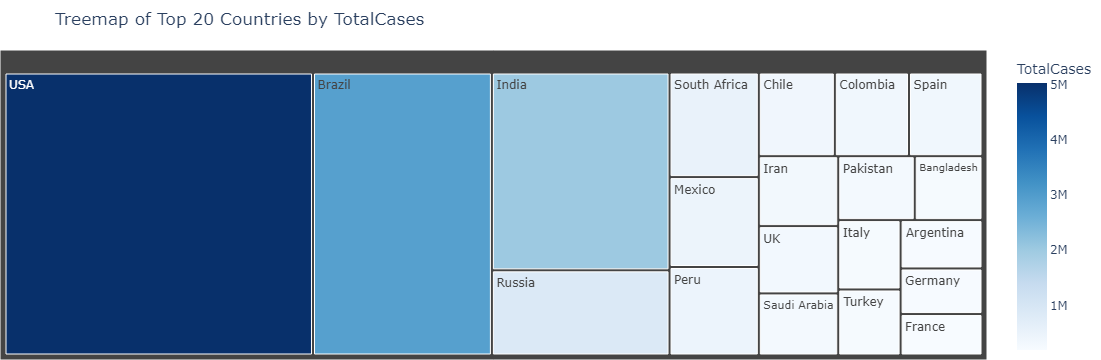

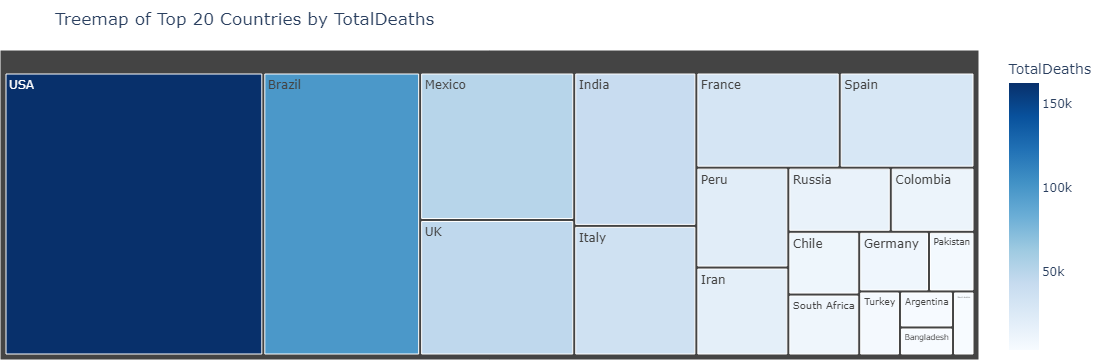

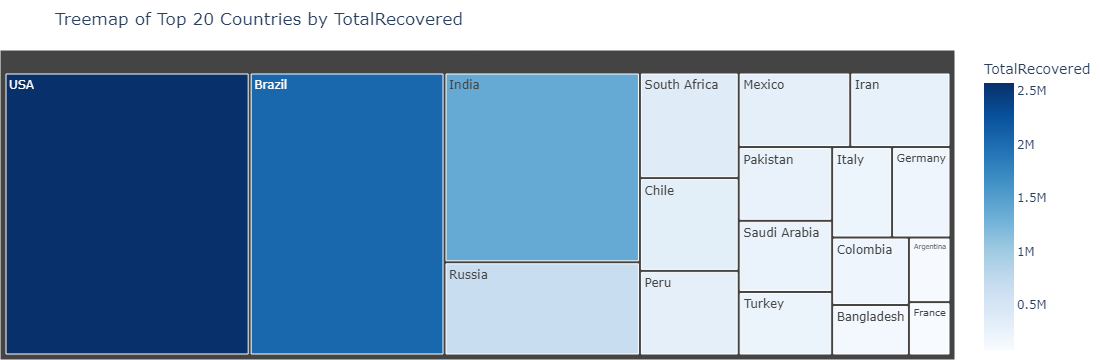

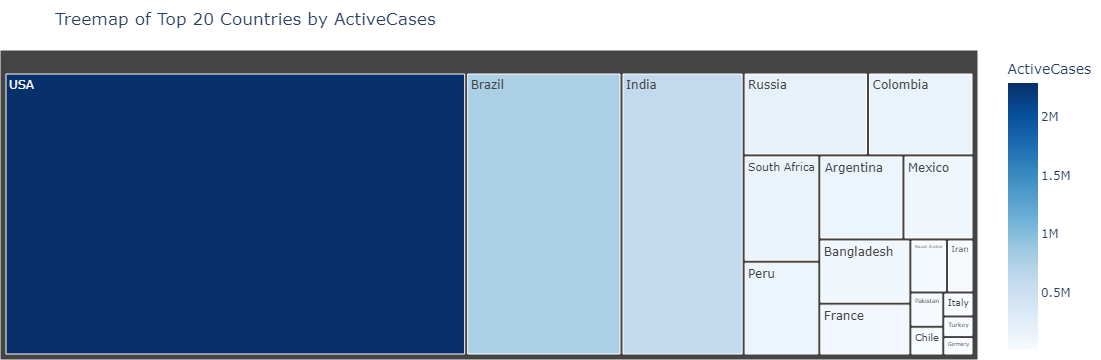

In [108]:
# Example usage, assuming world_data is a DataFrame with the necessary data
columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
for metric in columns:
    fig = px.treemap(world_data.iloc[0:20], values=metric, path=['Country/Region'],
                     title=f'Treemap of Top 20 Countries by {metric}',
                     color=metric,
                     color_continuous_scale='Blues')  # Specify a continuous scale of blue colors
    
    # Explicitly setting the paper and plot background color to white
    fig.update_layout(
        paper_bgcolor='white',
        plot_bgcolor='white',
        margin=dict(t=50, b=0, l=0, r=0)
    )
    
    # Update the colorway for the treemap to shades of blue
    fig.update_coloraxes(colorscale='Blues')

    # Show the figure
    fig.show()



The COVID-19 pandemic has affected countries unevenly, with the USA at the forefront, grappling with over 5 million cases and 162,804 deaths, highlighting intense viral spread and a robust healthcare response. Brazil trails with considerable struggles, evident from its 2.9 million cases and 98,644 deaths. India's situation differs, with over 2 million cases but a lower death toll of 41,638, possibly due to demographic factors or health system responses.

Europe's early pandemic experience shows in the high death-to-case ratios, with the UK, Italy, France, and Spain reporting significant fatalities. Countries like South Africa and Iran face high active case counts, indicating persistent challenges in infection management but also efforts towards reducing mortality. Overall, the global data reveals diverse pandemic phases and responses, from initial outbreaks to current containment and recovery efforts.mortality.

### COVID-19 Case Trends Visualization

This section creates a visual representation of COVID-19 case trends over time, including confirmed cases, deaths, recoveries, and active cases. It utilizes Plotly Express to generate a line chart, providing a clear and detailed view of how the pandemic has evolved.

In [16]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [17]:
# Convert the 'Date' column to datetime
day_wise['Date'] = pd.to_datetime(day_wise['Date'], errors='coerce')

# Get the last entry in the DataFrame, which should correspond to the most recent data.
latest_data = day_wise.iloc[-1]

# Create a DataFrame to display as a table with the latest data.
summary_table = pd.DataFrame([latest_data])

# Format the 'Date' column to display in the YYYY-MM-DD format.
summary_table['Date'] = summary_table['Date'].dt.strftime('%Y-%m-%d')

# Resetting index to make 'Date' a column and improve the table format.
summary_table.reset_index(drop=True, inplace=True)

# Show the summary table.
summary_table

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187


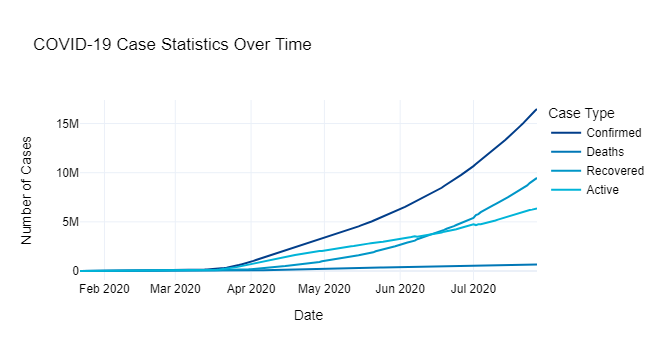

In [101]:
# Assuming 'day_wise' is your DataFrame and it contains 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active' columns
fig = px.line(day_wise, 
              x="Date", 
              y=["Confirmed", "Deaths", "Recovered", "Active"], 
              title="COVID-19 Case Statistics Over Time",
              template="plotly_white")

# Defining shades of blue for each line
colors = ['#023e8a', '#0077b6', '#0096c7', '#00b4d8']

# Update each trace (line) with a color from the predefined list
for i, trace in enumerate(fig.data):
    trace.line.color = colors[i % len(colors)]

# Updating the layout of the figure
fig.update_layout(
    xaxis_title="Date", 
    yaxis_title="Number of Cases",
    legend_title="Case Type", 
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="black" 
    )
)

# Showing the figure
fig.show()


On July 27, 2020, the cumulative data reflects a total of 16,480,485 confirmed COVID-19 cases and 654,036 deaths globally. The number of recovered patients stands at 9,468,087, while active cases tally at 6,358,362. The data reveals a daily increase of 228,693 cases and 5,415 new deaths, alongside 174,623 recoveries. These figures equate to a death rate of approximately 3.97% per confirmed case and a recovery rate of 57.45%. Notably, the mortality rate among those recovered is 6.91%, across 187 countries. The trend lines from January 22 to July 27 showcase the pandemic's progression, with a marked rise in cases from March 2020 as the virus proliferated globally. Despite a relatively stable death rate, the significant number of fatalities underscores the pandemic's severity. The increasing trend in recoveries offers a glimmer of hope, yet the ongoing rise in active cases at that point highlighted the continued challenge of controlling the pandemic's spread.

### Analysis of Testing Efficiency Across Countries

This section presents a comprehensive analysis of the efficiency of COVID-19 testing across the top 20 affected countries. The focus is on the "Tests Conducted per Confirmed Case by Country," represented through a 'pop_test_ratio'. This ratio, a critical metric, indicates the number of tests performed for every confirmed case of COVID-19 within a country. A higher ratio suggests a more extensive testing regime, potentially capturing a larger portion of asymptomatic cases or cases with mild symptoms, which is crucial for controlling the spread of the virus. By comparing these ratios, we gain insights into how different countries are managing their testing strategies in response to the pandemic. This analysis not only highlights the disparities in testing efforts but also underscores the global challenge in achieving uniform testing coverage.

In [32]:
pop_test_ratio=world_data.iloc[0:20]['Population']/world_data.iloc[0:20]['TotalTests']
pop_test_ratio

0       5.245489
1      16.106896
2      62.365033
3       4.911040
4      18.852446
5     122.115932
6      13.241331
7      10.866949
8      28.269105
9       6.618696
10     32.187237
11      3.877883
12      9.589865
13    107.484026
14    134.558952
15      8.514790
16     16.613857
17     56.934398
18      9.760649
19     16.353942
dtype: float64

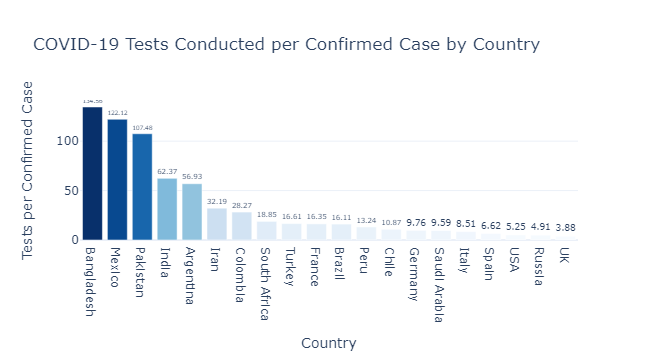

In [37]:
# Calculate the population to test ratio and add it to the DataFrame
world_data['pop_test_ratio'] = world_data['Population'] / world_data['TotalTests']

# Sorting the data in descending order to have the largest values at the beginning.
sorted_data = world_data.iloc[0:20].sort_values(by='pop_test_ratio', ascending=False)

# Creating a bar chart using a blue gradient color scheme and adding rounded values above the bars.
fig = px.bar(
    sorted_data,
    y='pop_test_ratio',
    x='Country/Region',
    text='pop_test_ratio', 
    template="plotly_white",
    title="COVID-19 Tests Conducted per Confirmed Case by Country",
    color='pop_test_ratio',  
    color_continuous_scale='Blues'  
)

# Updating the layout of the figure.
fig.update_layout(
    showlegend=False,  # Hide the legend as it's not necessary in this case.
    xaxis_title="Country",  # Adding a title for the x-axis.
    yaxis_title="Tests per Confirmed Case",  # Adding a title for the y-axis.
    xaxis={'categoryorder':'total descending'}  # Setting the order of countries on the x-axis to descending by the total value.
)

# Updating the text template to display rounded values and position the text outside the bars.
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Removing the color scale legend as it's redundant with the colors of the bars.
fig.update(layout_coloraxis_showscale=False)

# Displaying the chart.
fig.show()

The chart highlights significant disparities in COVID-19 testing ratios among countries. Bangladesh leads with over 130 tests per confirmed case, indicating an aggressive testing approach. Mexico and Pakistan also show high ratios, conducting over 100 tests for every confirmed case.

Conversely, the United Kingdom exhibits the lowest ratio at less than 4 tests per confirmed case. Russia and the United States have relatively low ratios, suggesting a constrained testing regimen or higher transmission rates.

Iran, Argentina, and Colombia fall in the moderate testing range with ratios between 20 and 40 tests per confirmed case.

These variations may stem from factors such as testing resource availability, pandemic stage, or transmission rates. Higher ratios suggest robust testing infrastructures or policies, aiding in early case detection and containment. Lower ratios may indicate limited testing capacity or a higher prevalence of undetected cases.

### Comparative Analysis of COVID-19 Impact Indicators Across Top 20 Countries
 

This section provides a comprehensive analysis of five key indicators of COVID-19's impact: 'Total Cases', 'Active Cases', 'Serious or Critical Cases', 'Total Deaths', and 'Total Recovered'. Through a series of visualizations, we examine the top 20 countries with the highest number of reported cases. Each indicator is represented by a separate bar chart, allowing for a clear comparison of how the pandemic has affected these countries differently. 'Total Cases' gives an overview of the overall scale of the pandemic, while 'Active Cases' indicate current infection levels. 'Serious or Critical Cases' provide insight into the current strain on healthcare resources, 'Total Deaths' reflect the mortality impact, and 'Total Recovered' offers a measure of the positive outcomes. Collectively, these charts present a nuanced picture of the pandemic's global footprint.

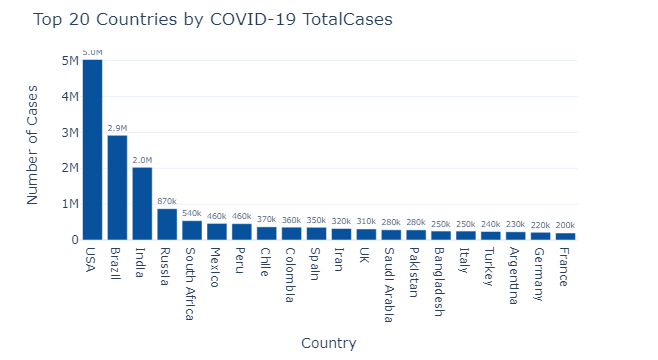

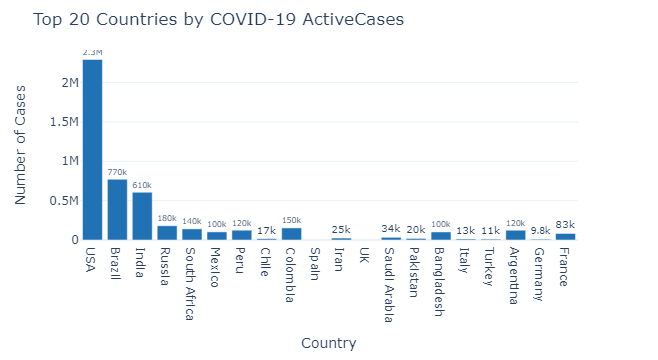

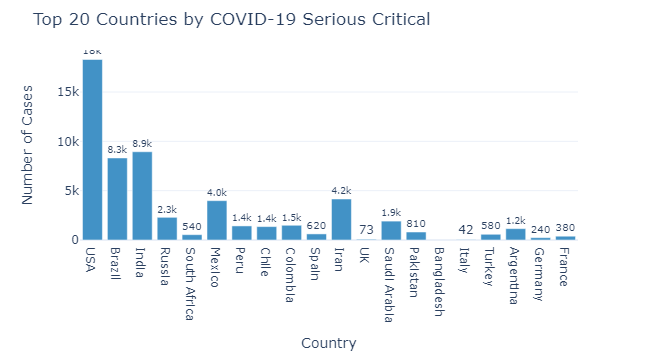

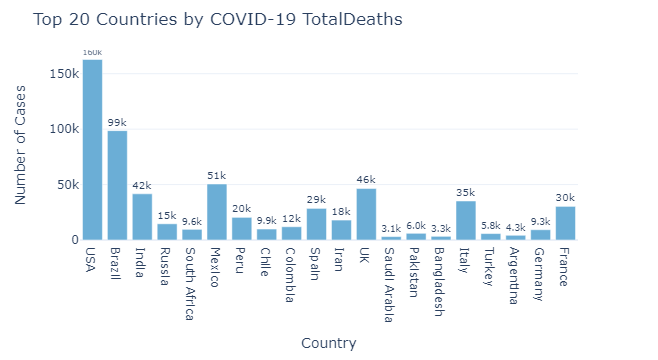

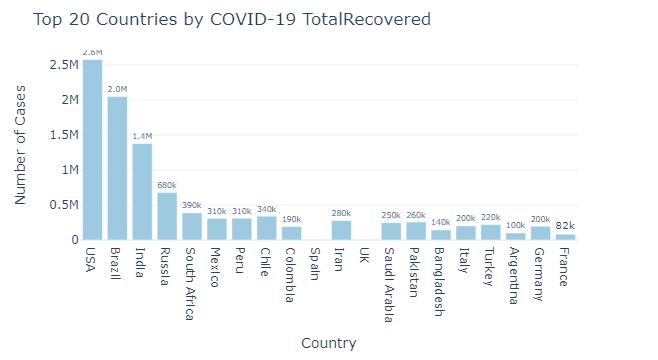

In [21]:
# Filter the DataFrame to include only the top 20 countries by Total Cases
top_countries = world_data.nlargest(20, 'TotalCases')

# Define the color scale
color_scale = px.colors.sequential.Blues[-2::-1]  # Using the darker end of the blue spectrum

# Create a separate bar chart for each case type
case_types = ['TotalCases', 'ActiveCases', 'Serious,Critical', 'TotalDeaths', 'TotalRecovered']
for i, case_type in enumerate(case_types):
    fig = px.bar(
        top_countries,
        x='Country/Region',
        y=case_type,
        title=f"Top 20 Countries by COVID-19 {case_type.replace(',', ' ')}",
        labels={'Country/Region': 'Country', case_type: 'Number of Cases'},
        template="plotly_white",
        color_discrete_sequence=[color_scale[i]]
    )
    
    # Customize the layout
    fig.update_layout(
        plot_bgcolor='white',
        xaxis_title="Country",
        yaxis_title="Number of Cases",
        showlegend=False
    )
    
    # Customize the bar labels to show rounded values
    fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')
    
    # Adjust layout to add space for the bar labels
    fig.update_layout(margin=dict(t=50, b=100))
    
    # Display the figure
    fig.show()

The series of bar charts titled "Top 20 Countries by COVID-19 Total Cases," "Active Cases," "Serious Critical," "Total Deaths," and "Total Recovered" provide a stark comparison of the pandemic's impact. The charts illustrate the USA leading in all categories, with 5 million total cases, 2.3 million active cases, 18,000 serious or critical cases, 160,000 deaths, and 2.6 million recoveries.

Brazil follows with 2.9 million total cases, showing substantial numbers but significantly less than the USA. India stands out with a high number of total and active cases, suggesting a rapid spread of the virus, yet it has a lower number of serious or critical cases and deaths compared to the USA and Brazil. This could imply differences in healthcare outcomes, reporting, or demographic impacts on the disease's severity.

Russia, with 870,000 total cases, and South Africa, with 540,000, also show significant numbers but have considerably fewer serious or critical cases, which could be indicative of a less strained healthcare system or variations in case severity.

The UK, despite having lower total and active cases, exhibits a relatively high number of serious or critical cases and deaths, underscoring a severe impact of the virus. France, with the lowest figures among the top 20 for serious or critical cases and deaths, may reflect effective management of the virus's spread or healthcare response.

The "Total Recovered" chart demonstrates optimistic figures, with the USA and Brazil leading in recoveries. However, these numbers also correlate with their high number of total cases.

These visualizations underscore the varying degrees of the pandemic's severity across countries, reflecting a multitude of factors including testing rates, healthcare capacity, and the effectiveness of measures taken to control the virus's spread.

### Global Analysis: COVID-19 Total Confirmed Cases in the Top 20 Most Affected Countries

This section delves into an in-depth examination of the COVID-19 pandemic's impact, focusing on the top 20 countries with the highest total confirmed cases. Utilizing horizontal bar charts, we represent each country's total confirmed cases in millions, offering a clear and comparative perspective of the pandemic's scale across these nations. This analysis not only sheds light on the countries most affected by the pandemic but also serves as a visual representation of the global challenge posed by COVID-19. Through this detailed examination, we aim to provide insights into the extent of the pandemic's reach and the varied impact on different countries.

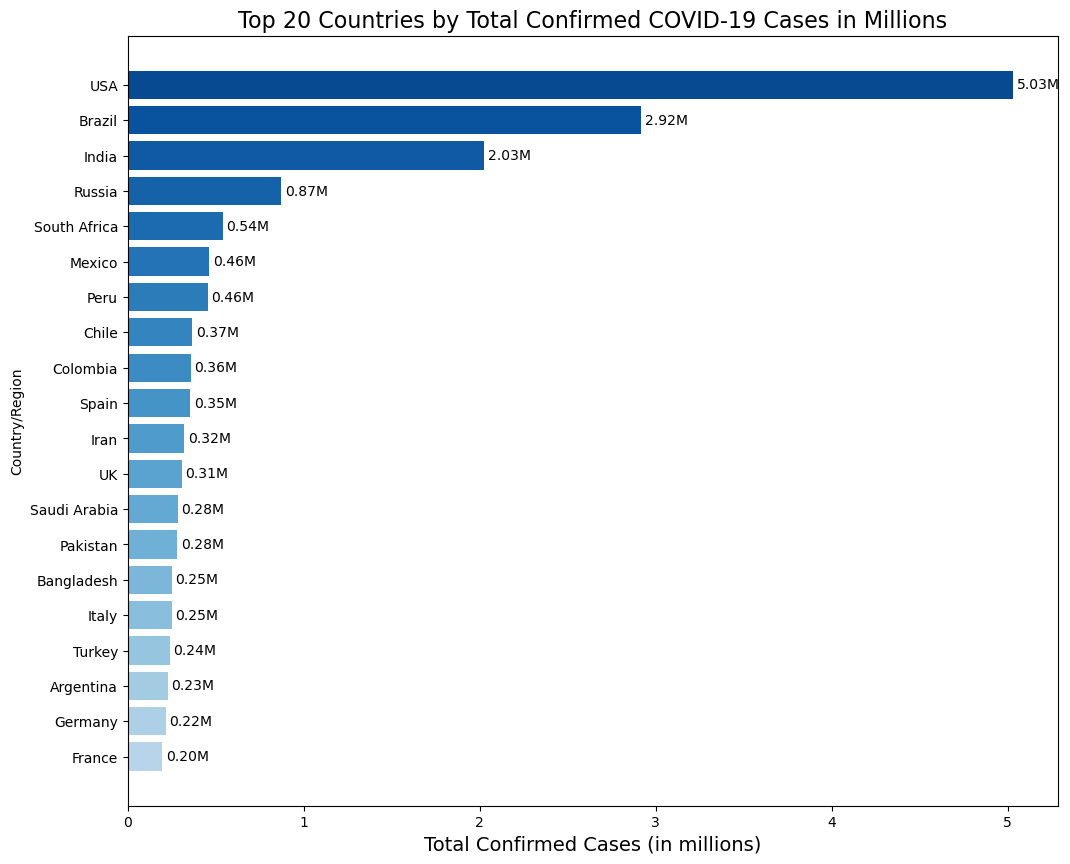

In [22]:
# Assume 'world_data' DataFrame is predefined and includes relevant data.
world_data['TotalCases_Millions'] = world_data['TotalCases'] / 1e6
top_20_data = world_data.head(20)

# Sorting data by 'TotalCases_Millions' in ascending order for a clear visual representation.
top_20_data_sorted = top_20_data.sort_values('TotalCases_Millions', ascending=True)

plt.figure(figsize=(12, 10))

# Creating a continuous colormap from dark blue to light blue for visual differentiation.
num_colors = len(top_20_data_sorted)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, num_colors))

# Drawing bars for the top 20 countries with manual color assignments for each bar.
for i, (index, row) in enumerate(top_20_data_sorted.iterrows()):
    plt.barh(row['Country/Region'], row['TotalCases_Millions'], color=colors[i])

# Annotating values on the bars for direct readability, positioned at the end of each bar.
for index, row in enumerate(top_20_data_sorted.iterrows()):
    plt.text(row[1]['TotalCases_Millions'] + 0.02, index, '{:.2f}M'.format(row[1]['TotalCases_Millions']), va='center', ha='left', fontsize=10)

# Setting the title and axes labels to contextualize the chart.
plt.title('Top 20 Countries by Total Confirmed COVID-19 Cases in Millions', fontsize=16)
plt.xlabel('Total Confirmed Cases (in millions)', fontsize=14)
plt.ylabel('Country/Region')

# Displaying the finalized plot.
plt.show()


The chart "Top 20 Countries by Total Confirmed COVID-19 Cases in Millions" starkly presents the USA at the forefront with 5.03 million cases, trailed by Brazil and India with 2.92 and 2.03 million cases, respectively. This visualization highlights the uneven distribution of the pandemic's burden, with a pronounced drop from the top three to countries like Russia and Mexico, each reporting under a million cases. At the chart's lower spectrum, Argentina, Germany, and France, each with just over 0.20 million cases, may reflect differing containment success or later virus introduction. The visual disparity among countries suggests diverse challenges and responses to the pandemic, meriting deeper investigation into the interplay of demographic, health, and policy factors.

### Comparative Death Toll from COVID-19: Analysis of the Top 20 Most Impacted Countries

This visualization presents a compelling overview of the total number of COVID-19 related deaths in the 20 countries most affected by the pandemic. Each horizontal bar reflects the gravity of the situation in a respective nation, with the bar lengths proportionate to the death tolls reported. This graph serves as a sobering reminder of the pandemic's impact and may prompt discussions on public health responses, healthcare system resilience, and the broader socio-economic consequences of the global health crisis.

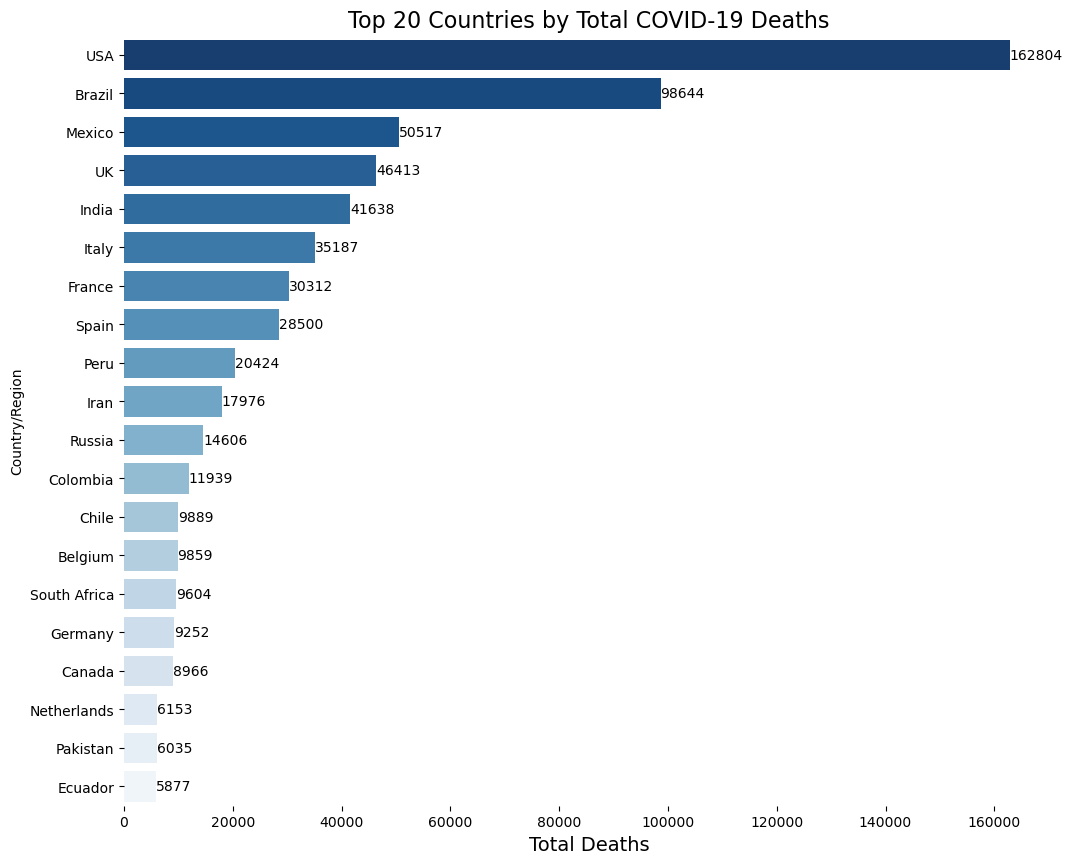

In [23]:
# Sorting data by 'TotalDeaths' in descending order for the top 20 countries.
top_20_deaths = world_data.sort_values('TotalDeaths', ascending=False).head(20)

plt.figure(figsize=(12, 10))

# Creating a list of colors for the continuous colormap from dark blue to light blue for visual differentiation.
colors = sns.color_palette('Blues', n_colors=len(top_20_deaths)).as_hex()

# Drawing bars for the top 20 countries with manual color assignments for each bar.
sns.barplot(
    x='TotalDeaths',
    y='Country/Region',
    hue='Country/Region',  # Assigning 'Country/Region' to hue
    data=top_20_deaths,
    palette=colors[::-1],  # Reverse to ensure dark blue for highest values
    dodge=False
)

# Disable the legend since we are manually creating a continuous palette.
plt.legend([],[], frameon=False)

# Annotating values on the bars for direct readability, positioned at the end of each bar.
for i, (value, name) in enumerate(zip(top_20_deaths['TotalDeaths'], top_20_deaths['Country/Region'])):
    plt.text(value, i, f'{value:.0f}', va='center')  # Format the text to remove decimals

# Setting the title and axes labels to contextualize the chart.
plt.title('Top 20 Countries by Total COVID-19 Deaths', fontsize=16)
plt.xlabel('Total Deaths', fontsize=14)
plt.ylabel('Country/Region')

# Remove all spines for a clean look.
sns.despine(left=True, bottom=True)

# Display the finalized plot.
plt.show()

The "Top 20 Countries by Total COVID-19 Deaths" chart shows the USA at the forefront with 162,804 deaths, followed by Brazil at 98,644 and Mexico at 50,517, reflecting the intense impact in these countries. European nations UK, Italy, and France report deaths in the 30,000 to 46,000 range, highlighting the virus's severe early impact there. In contrast, India, despite a high case count, shows 41,638 deaths, suggesting demographic or reporting differences. Countries with lower figures, like South Africa and Germany, indicate varying response efficacy or pandemic stages. The data illustrates the critical need for robust health strategies to combat COVID-19's ongoing threat.

### Snapshot of Intensity: Top 20 Countries with the Highest Active COVID-19 Cases (Jan 2020 - Jul 2020)

This graph provides a retrospective look at the countries with the most active COVID-19 cases during the period from January 27, 2020, to July 22, 2020. The chart offers a clear numerical context to the pandemic's spread in these regions at that time. It reflects the state of the pandemic during a crucial six-month window, illustrating the global spread and areas most in need of resources and attention during that phase.

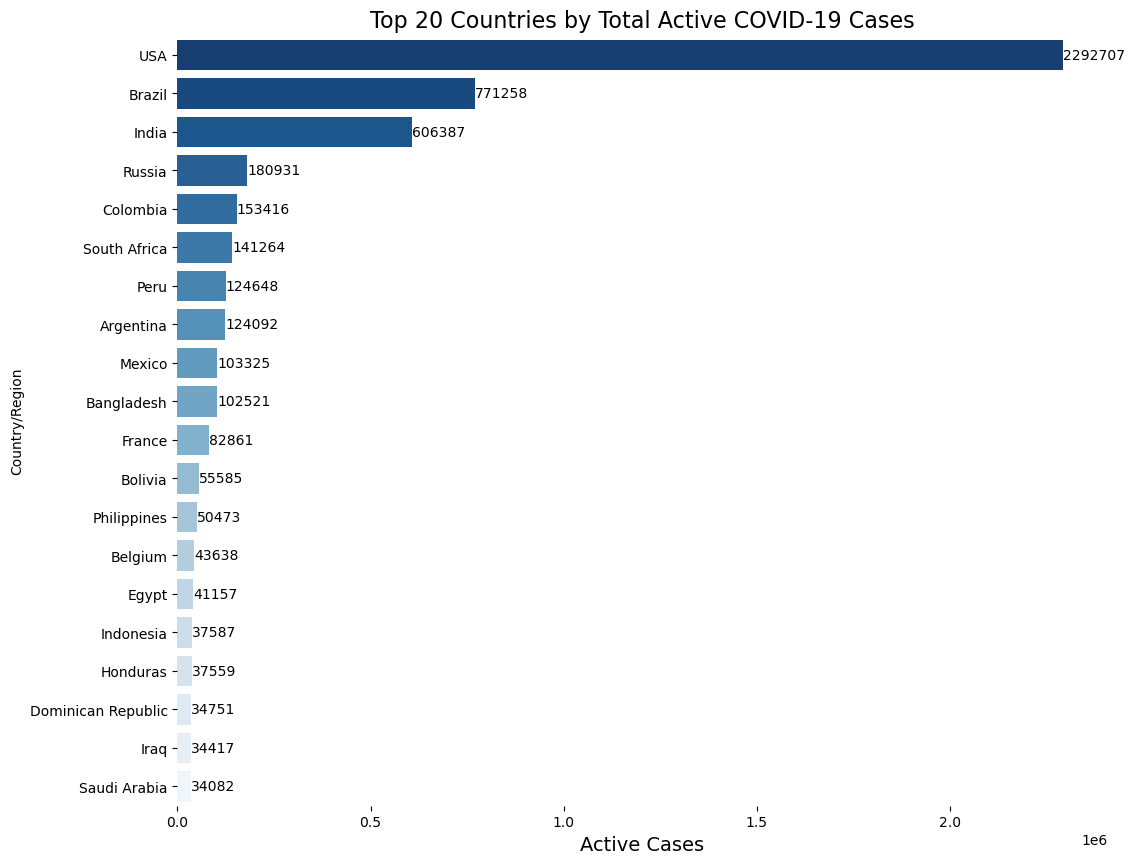

In [24]:
# Sorting data by 'ActiveCases' in descending order for the top 20 countries.
top_20_active = world_data.sort_values('ActiveCases', ascending=False).head(20)

plt.figure(figsize=(12, 10))

# Create a color palette with as many colors as there are countries in the subset.
colors = sns.color_palette('Blues', n_colors=len(top_20_active)).as_hex()  # Convert to hex to avoid future warnings

# Drawing bars for the top 20 countries with manual color assignments for each bar.
sns.barplot(
    x='ActiveCases',
    y='Country/Region',
    data=top_20_active,
    hue='Country/Region',  # Assigning 'Country/Region' to hue to comply with future Seaborn updates
    dodge=False,  # Bars won't be dodged
    palette=colors[::-1]  # Reverse to ensure dark blue for highest values
)

# Disabling the legend as it is unnecessary in this context.
plt.legend([],[], frameon=False)

# Annotating values on the bars for direct readability, positioned at the end of each bar.
for i, (value, name) in enumerate(zip(top_20_active['ActiveCases'], top_20_active['Country/Region'])):
    plt.text(value, i, f'{value:.0f}', va='center')  # Format the text to remove decimals

# Setting the title and axes labels to contextualize the chart.
plt.title('Top 20 Countries by Total Active COVID-19 Cases', fontsize=16)
plt.xlabel('Active Cases', fontsize=14)
plt.ylabel('Country/Region')

# Remove all spines for a clean look.
sns.despine(left=True, bottom=True)

# Display the finalized plot.
plt.show()


The chart, "Top 20 Countries by Total Active COVID-19 Cases (Jan 2020 - Jul 2020)," shows the USA leading with an alarming 2,292,707 active cases. Brazil and India follow with 771,258 and 606,387 cases, respectively, indicating significant outbreaks. Russia and Colombia also have high counts, over 150,000 cases each, suggesting widespread transmission.

Countries like South Africa, Peru, and Argentina show a substantial number of active cases, ranging from around 124,000 to 141,000, denoting serious local epidemics. Notably, lower down the list, countries such as the Dominican Republic, Iraq, and Saudi Arabia report active cases near the 35,000 mark.

The data encapsulates the pandemic’s status in the first half of 2020, reflecting intense pressure on the healthcare systems of these nations. This chart underscores the need for continued global vigilance and resource allocation to manage and overcome COVID-19's impact.

### Resilience and Recovery: Tracking COVID-19 Recoveries in the Most Affected Nations

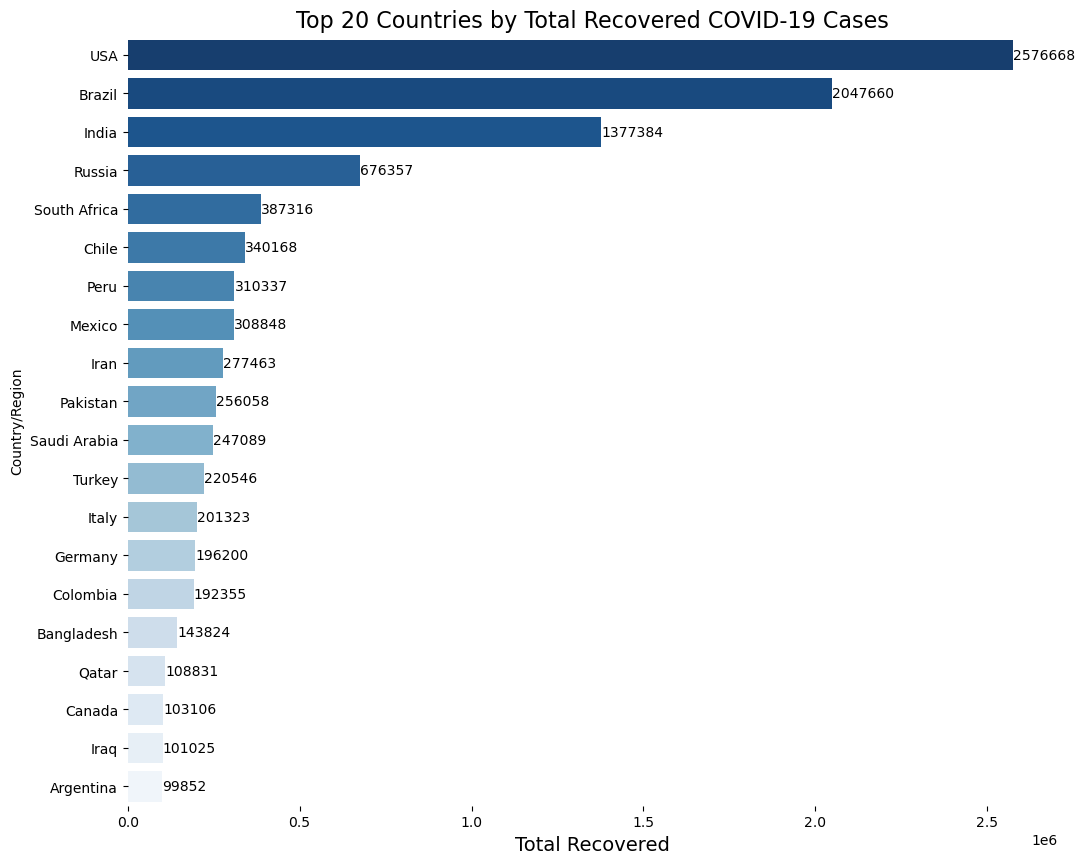

In [25]:
# Sorting data by 'TotalRecovered' in descending order for the top 20 countries.
top_20_recovered = world_data.sort_values('TotalRecovered', ascending=False).head(20)

plt.figure(figsize=(12, 10))

# Creating a continuous colormap from dark blue to light blue for visual differentiation.
colors = sns.color_palette('Blues', n_colors=len(top_20_recovered)).as_hex()

# Drawing bars for the top 20 countries with manual color assignments for each bar.
sns.barplot(
    x='TotalRecovered',
    y='Country/Region',
    data=top_20_recovered,
    hue='Country/Region',  # Assigning 'Country/Region' to hue to avoid FutureWarning
    dodge=False,  # Ensure bars are not dodged
    palette=colors[::-1]  # Reverse to ensure dark blue for highest values
)

# Removing the legend since it's redundant in this context.
plt.legend([],[], frameon=False)

# Annotating values on the bars for direct readability, positioned at the end of each bar.
for i, (value, name) in enumerate(zip(top_20_recovered['TotalRecovered'], top_20_recovered['Country/Region'])):
    plt.text(value, i, f'{value:.0f}', va='center')  # Format the text to remove decimals

# Setting the title and axes labels to contextualize the chart.
plt.title('Top 20 Countries by Total Recovered COVID-19 Cases', fontsize=16)
plt.xlabel('Total Recovered', fontsize=14)
plt.ylabel('Country/Region')

# Remove all spines for a clean look.
sns.despine(left=True, bottom=True)

# Display the finalized plot.
plt.show()


The bar chart "Top 20 Countries by Total Recovered COVID-19 Cases" illustrates the count of recovered patients from the pandemic. The USA leads with over 2.5 million recoveries, indicating a substantial number of resolved cases. Brazil and India follow with around 2 million and 1.37 million recoveries, respectively, showcasing significant recovery figures. 

Russia and South Africa, with 673,000 and 383,000 recoveries, along with other countries like Chile and Peru, highlight the global reach of recovery efforts. Lower on the list, countries such as Qatar, Canada, Iraq, and Argentina report recoveries ranging from around 99,000 to 108,000, suggesting varying scales of the pandemic's impact and the capacity of healthcare systems to manage and resolve cases.

This visualization conveys a message of hope and resilience, as it accounts for the millions who have recovered from the virus. It also suggests the diverse healthcare outcomes across different regions and the ongoing global challenge of managing the pandemic.

### COVID-19 Global Case Overview: Status and Outcomes (Jan 27 - Jul 22, 2020)

This section provides a comprehensive breakdown of the global COVID-19 situation within the first critical seven months of 2020. Utilizing a series of donut charts, we offer a visual analysis of the active cases, deaths, serious/critical cases, and recoveries as proportions of the total reported cases. This format allows for an immediate grasp of the pandemic's scale and the relative size of each category, giving insight into the disease's impact and the effectiveness of the global response during this period. Through this, we aim to convey the full scope of COVID-19's effects, from ongoing active cases to the hopeful number of recoveries.

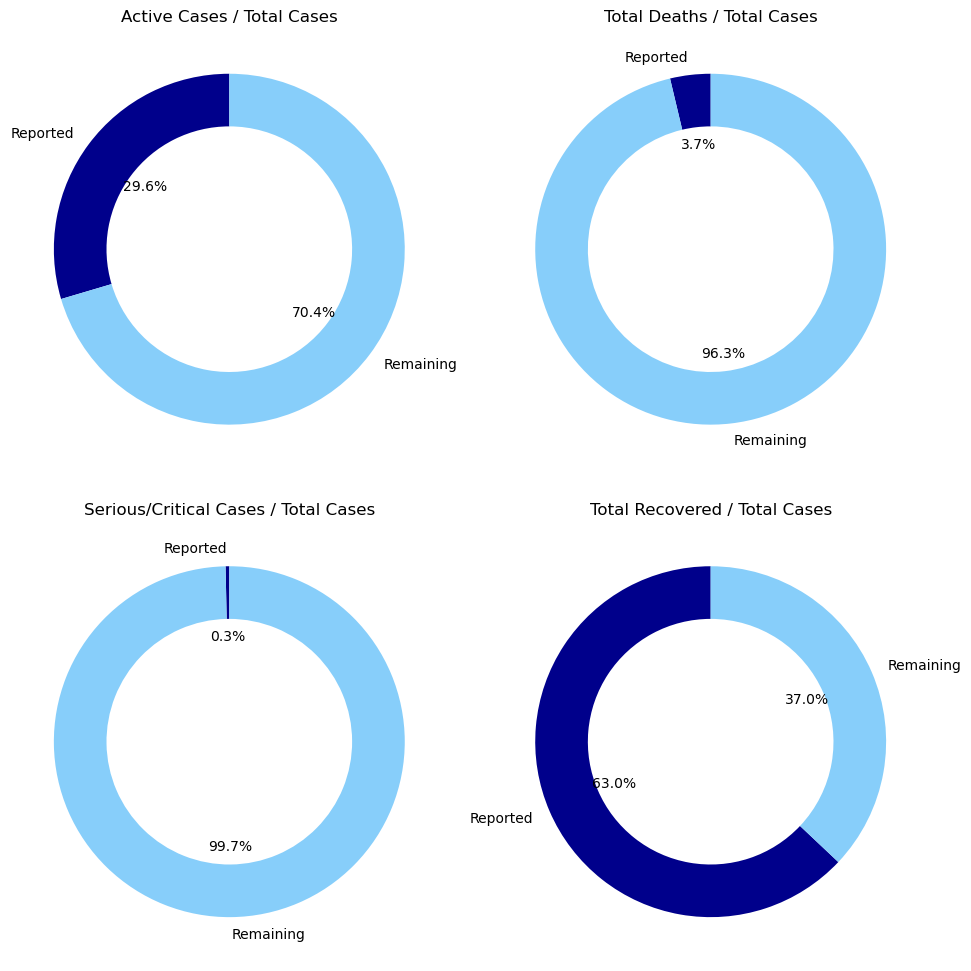

In [40]:
# Assuming 'world_data' DataFrame is predefined and includes the necessary COVID-19 data columns
total_cases = world_data['TotalCases'].sum()
active_cases = world_data['ActiveCases'].sum()
total_deaths = world_data['TotalDeaths'].sum()
serious_critical = world_data['Serious,Critical'].sum()
total_recovered = world_data['TotalRecovered'].sum()

# Setting up the ratios for each category
ratios_active = [active_cases, total_cases - active_cases]
ratios_deaths = [total_deaths, total_cases - total_deaths]
ratios_serious = [serious_critical, total_cases - serious_critical]
ratios_recovered = [total_recovered, total_cases - total_recovered]

# Colors for each category: dark blue for the main category, light blue for the remainder
colors = ['#00008B', '#87CEFA']  # DarkBlue, LightSkyBlue

# Create subplots: 2 rows, 2 cols
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot each donut chart
axs[0, 0].pie(ratios_active, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
axs[0, 0].set_title('Active Cases / Total Cases')

axs[0, 1].pie(ratios_deaths, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
axs[0, 1].set_title('Total Deaths / Total Cases')

axs[1, 0].pie(ratios_serious, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
axs[1, 0].set_title('Serious/Critical Cases / Total Cases')

axs[1, 1].pie(ratios_recovered, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
axs[1, 1].set_title('Total Recovered / Total Cases')

# Adjust layout to make room for titles
plt.tight_layout()

# Show the plot
plt.show()


The set of donut charts illustrates the proportions of active, critical, recovered, and deceased cases relative to the total reported COVID-19 cases between January 27, 2020, and July 22, 2020. Active cases constitute 29.6% of the total, while deaths account for a significantly smaller proportion of 3.7%. Cases in a serious or critical condition are a mere 0.3%, emphasizing the majority of cases are not critical. Notably, the recovered cases make up a substantial 63.0%, signaling a high rate of recoveries relative to active infections during this period. These figures underscore the varied outcomes of COVID-19 infections and highlight the critical nature of medical interventions and healthcare system responses in managing the pandemic.

### The Fatality Scale: Analyzing the Deaths to Cases Ratio During COVID-19

This section focuses on the 'Deaths to Cases Ratio', an essential statistic for understanding the fatality rate of COVID-19 among the top 20 most impacted nations from January to July 2020. This ratio, derived by dividing the total deaths by the total cases, offers insight into the deadliness of the virus in the context of reported infections. It sheds light on the potential risks faced by populations and the critical nature of the medical response in each region. This assessment aims to contribute to the global conversation on health strategies and resource allocation amid the ongoing pandemic challenge.

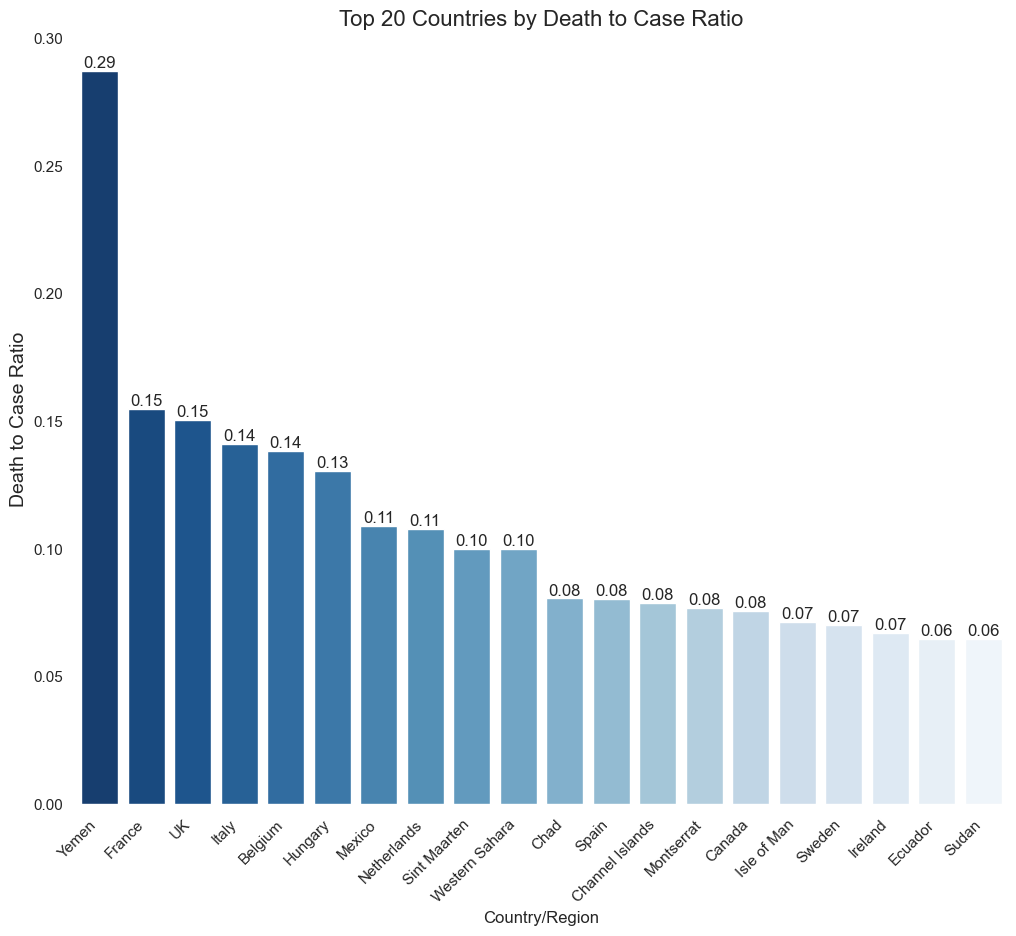

In [60]:
# Ensure the seaborn style is set to 'white' to have a white background for the plot
sns.set_style("white")

# Calculate the deaths to cases ratio
world_data['Deaths_to_Cases'] = world_data['TotalDeaths'] / world_data['TotalCases']

# Sorting data by 'Deaths_to_Cases' in descending order for the top 20 countries
top_20_deaths_to_cases = world_data.sort_values('Deaths_to_Cases', ascending=False).head(20)

plt.figure(figsize=(12, 10))

# Creating a list of colors for the continuous colormap from dark blue to light blue
colors = sns.color_palette('Blues', n_colors=len(top_20_deaths_to_recovered))

# Drawing bars for the top 20 countries with manual color assignments for each bar
sns.barplot(
    y='Deaths_to_Cases',
    x='Country/Region',  # x and y are correctly assigned for a vertical bar chart
    hue='Country/Region',  # Assigning 'Country/Region' to hue
    data=top_20_deaths_to_cases,
    palette=colors[::-1],  # Reverse to ensure dark blue for highest values
    dodge=False
)

# Disable the legend as it's not necessary
plt.legend([], [], frameon=False)

# Annotating values on the bars for direct readability
for i, (value, name) in enumerate(zip(top_20_deaths_to_cases['Deaths_to_Cases'], top_20_deaths_to_cases['Country/Region'])):
    plt.text(i, value, f'{value:.2f}', va='bottom', ha='center')  # Adjusted positioning for vertical bars

# Setting the title and axes labels to contextualize the chart
plt.title('Top 20 Countries by Death to Case Ratio', fontsize=16)
plt.ylabel('Death to Case Ratio', fontsize=14)
plt.xlabel('Country/Region')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove all spines for a cleaner look
sns.despine(left=True, bottom=True)

# Display the plot
plt.show()


The bar chart titled "Top 20 Countries by Death to Case Ratio" displays the proportion of deaths to total reported cases for each country. Yemen stands out with the highest ratio at 0.29, indicating that 29% of reported cases resulted in death, which is markedly higher than in other countries on the list. This could suggest severe outbreaks, limited healthcare resources, or reporting discrepancies.

France, the UK, Italy, and Belgium follow, with ratios ranging from 0.15 to 0.14, reflecting a significant fatality rate in relation to their total cases. This may point to the impact of the virus on these countries' populations or healthcare systems' ability to cope with critical patients during the early pandemic phase.

Towards the lower end, Canada, Isle of Man, Sweden, Ireland, Ecuador, and Gabon report ratios between 0.06 and 0.08, indicating a lower death rate compared to their total case counts. This suggests better management of cases or a wider infection spread with less severity.

This visualization underscores the varied death rates in the context of total infections across these countries, providing a stark comparison of the pandemic's lethality during the specified period. It emphasizes the need for robust healthcare systems and effective pandemic response strategies.

### Testing Efficiency: The Ratio of Tests to Confirmed COVID-19 Cases

This section examines the 'Tests to Confirmed Ratio', which is defined as the number of tests conducted for every confirmed case of COVID-19. This ratio serves as a benchmark for understanding the efficiency and extent of testing procedures across the top 20 countries. A higher ratio indicates a more aggressive testing strategy, reflecting the thoroughness of surveillance and the ability to detect cases within a population. Through this analysis, we can gain insight into how different countries prioritize and manage testing in the face of the pandemic. 

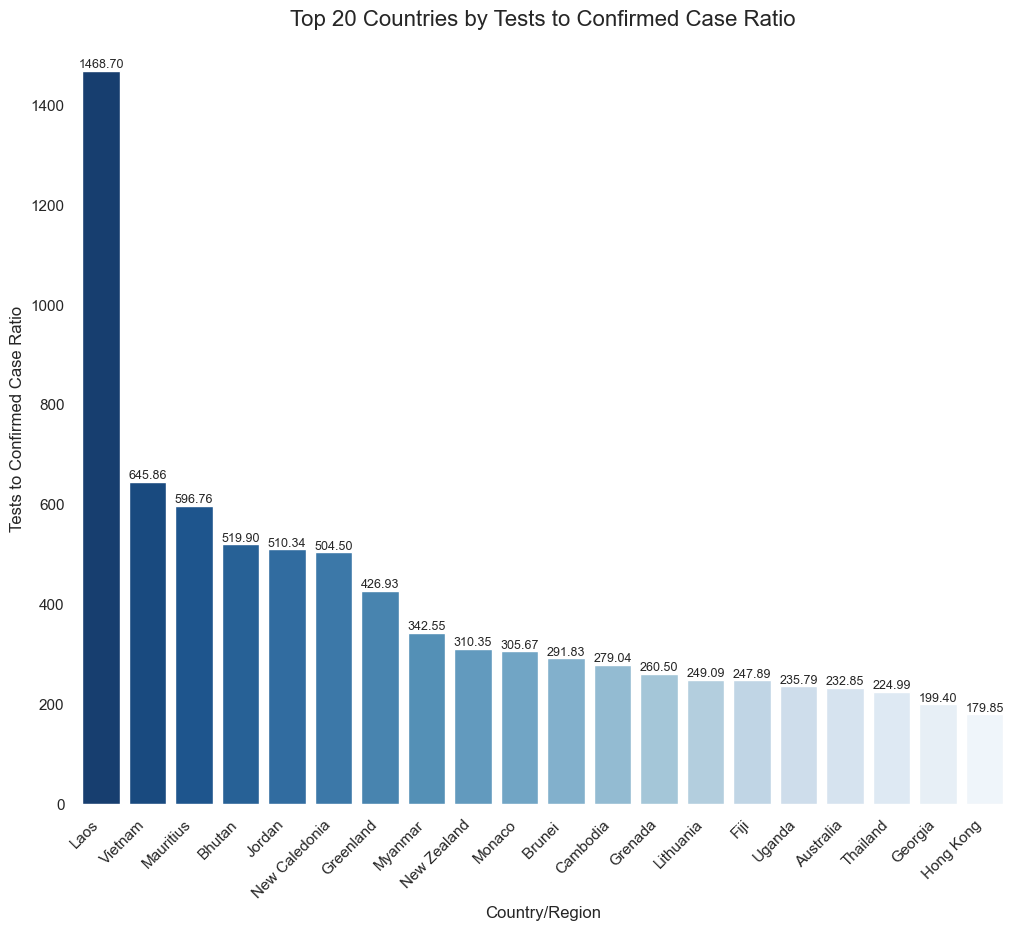

In [64]:
# Set the seaborn style to 'white' for a consistent background
sns.set_style("white")

# Calculate the tests to confirmed case ratio
world_data['Tests_to_Confirmed'] = world_data['TotalTests'] / world_data['TotalCases']

# Sorting data by 'Tests_to_Confirmed' in descending order for visualization
top_data_tests_to_confirmed = world_data.sort_values('Tests_to_Confirmed', ascending=False).head(20)

plt.figure(figsize=(12, 10))

# Create a continuous color palette from dark blue to light blue
colors = sns.color_palette('Blues', n_colors=len(top_data_tests_to_confirmed))

# Drawing bars with manual color assignments
barplot = sns.barplot(
    x='Country/Region', 
    y='Tests_to_Confirmed', 
    hue='Country/Region',  # Assigning 'Country/Region' to hue
    data=top_data_tests_to_confirmed,
    dodge=False,
    palette=colors[::-1]  # Reverse to ensure dark blue for higher values
)

# Disable the legend as it's unnecessary for this plot
plt.legend([], [], frameon=False)

# Annotating values on the bars for direct readability, adjusting font size
for i, (value, name) in enumerate(zip(top_data_tests_to_confirmed['Tests_to_Confirmed'], top_data_tests_to_confirmed['Country/Region'])):
    plt.text(i, value, f'{value:.2f}', va='bottom', ha='center', fontsize=9)  # Reduced fontsize for clarity

# Setting the title and axes labels
plt.title('Top 20 Countries by Tests to Confirmed Case Ratio', fontsize=16)
plt.xlabel('Country/Region')
plt.ylabel('Tests to Confirmed Case Ratio')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove all spines for a clean look
sns.despine(left=True, bottom=True)

# Display the plot
plt.show()


The bar chart "Top 20 Countries by Tests to Confirmed Case Ratio" showcases countries ranked by the number of tests conducted per confirmed case of COVID-19. Laos leads significantly with a ratio of approximately 1468 tests per confirmed case, indicating a high rate of testing in relation to the number of confirmed cases.

Following Laos, Vietnam and Mauritius have ratios of about 646 and 597, respectively, showing substantial testing per confirmed case. This may suggest robust testing strategies or a lower prevalence of the virus in these regions. As the chart progresses, the ratio steadily declines, with countries like Monaco, Canada, and Fiji presenting ratios ranging from 305 to 427.

Toward the bottom of the list, Australia, Georgia, and Hong Kong report lower ratios, around 224 to 199 tests per confirmed case, which might reflect different stages of the pandemic or variations in testing policies.

This visualization emphasizes the importance of widespread testing in understanding and controlling the pandemic's spread. It also highlights disparities in testing rates, which can inform public health strategies and the allocation of testing resources.

### Critical Conditions: Evaluating the Serious-to-Death Ratio in COVID-19 Cases

The 'Serious-to-Death Ratio' is a metric providing insight into the gravity of COVID-19 cases within a country. This ratio compares the number of serious or critical cases to the number of fatalities, offering a glimpse into the severity of cases that lead to death. A higher 'Serious-to-Death Ratio' could indicate a greater proportion of serious cases amongst the fatalities, suggesting potential strains on healthcare resources or the virulence of the virus strain affecting the population. This analysis aims to highlight the criticality of the healthcare response in managing the most severe COVID-19 cases.

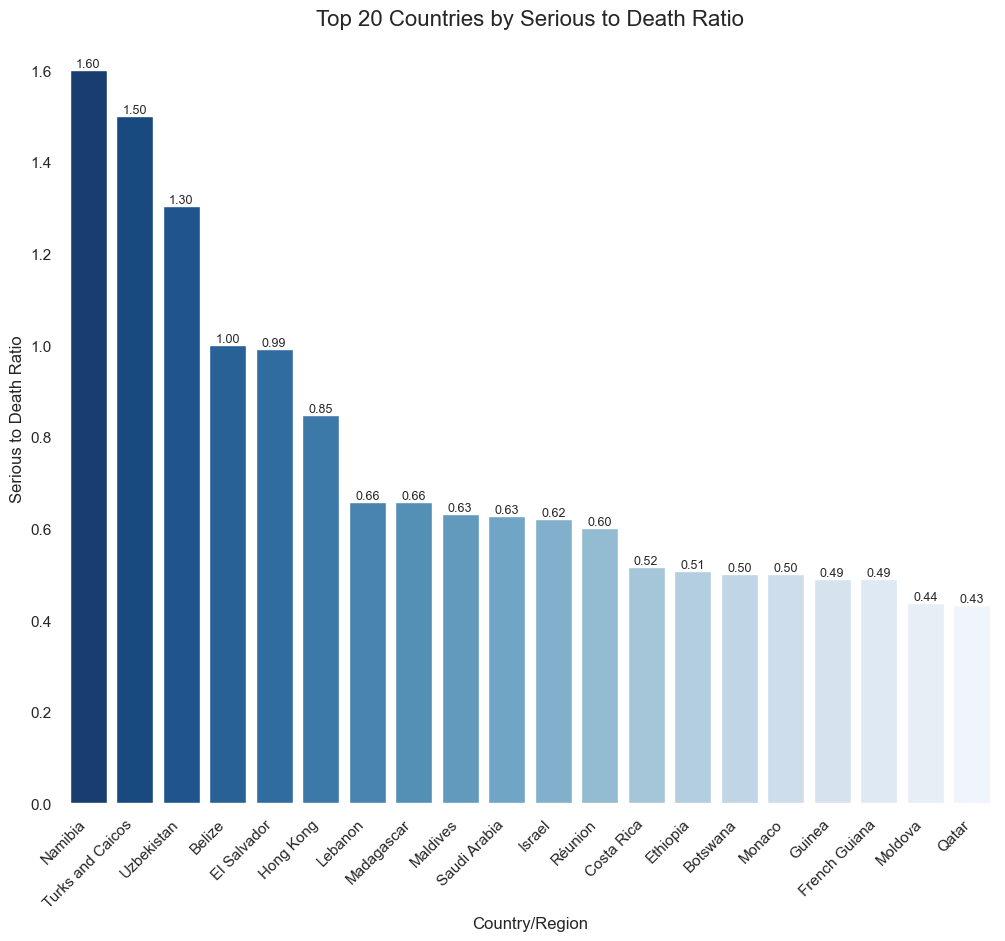

In [66]:
# Calculate the serious to death ratio
world_data['Serious_to_Death'] = world_data['Serious,Critical'] / world_data['TotalDeaths']

# Sorting data by 'Serious_to_Death' in descending order for visualization
top_data_serious_to_death = world_data.sort_values('Serious_to_Death', ascending=False).head(20)

plt.figure(figsize=(12, 10))

# Create a continuous color palette from dark blue to light blue
colors = sns.color_palette('Blues', n_colors=len(top_data_serious_to_death))

# Drawing bars with manual color assignments
barplot = sns.barplot(
    x='Country/Region', 
    y='Serious_to_Death', 
    hue='Country/Region',  # Assigning 'Country/Region' to hue
    data=top_data_serious_to_death,
    dodge=False,
    palette=colors[::-1]  # Reverse to ensure dark blue for higher values
)

# Disable the legend as it's unnecessary for this plot
plt.legend([], [], frameon=False)

# Annotating values on the bars for direct readability, adjusting font size
for i, (value, name) in enumerate(zip(top_data_serious_to_death['Serious_to_Death'], top_data_serious_to_death['Country/Region'])):
    plt.text(i, value, f'{value:.2f}', va='bottom', ha='center', fontsize=9)  # Reduced fontsize for clarity

# Setting the title and axes labels
plt.title('Top 20 Countries by Serious to Death Ratio', fontsize=16)
plt.xlabel('Country/Region')
plt.ylabel('Serious to Death Ratio')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove all spines for a clean look
sns.despine(left=True, bottom=True)

# Display the plot
plt.show()


The "Top 20 Countries by Serious to Death Ratio" bar chart presents the ratio of serious or critical COVID-19 cases to deaths, indicating the severity of cases that resulted in fatalities. The highest ratio is seen in Namibia at 1.60, implying a greater share of serious cases among the deaths, potentially reflecting on the healthcare challenges or virus severity. Turkmenistan follows with a ratio of 1.30, and Lesotho with 1.00, showing a significant proportion of serious cases in the deceased count.

As the ratios decrease, countries like Saudi Arabia, Brazil, and Pakistan display ratios around 0.60, suggesting a lower proportion of their deaths were in serious or critical condition before passing, possibly due to different healthcare capabilities or case management strategies.

Chile and Qatar, with the lowest ratios of around 0.43, might indicate better management of serious cases or differences in reporting. These data point to the varied nature of the pandemic's impact across countries, the capacity of healthcare systems to manage severe cases, and the effectiveness of medical interventions.

### COVID-19 Trajectory: A Four-Pronged View of Case Trends in Poland And Germany

This visualization juxtaposes the COVID-19 impact in Poland and Germany, presenting a side-by-side comparison of the pandemic's progression in these neighboring European countries. It delineates four pivotal indicators: Confirmed, Active, Recovered, and Deaths, thereby providing a comprehensive overview of each country's pandemic trajectory. This analysis reveals not only the total case count but also the current state of active cases, the success in recoveries, and the mortality rates. By contrasting these closely situated nations, we can discern the nuances in their public health responses and the epidemiological patterns that have emerged over the course of the pandemic. The comparison aims to highlight the shared challenges and distinct outcomes shaped by each country's unique approach to combating the virus.

In [50]:
group_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [96]:
def improved_country_visualization(group_data, country):
    # Filter data for the selected country
    data = group_data[group_data['Country/Region'] == country]
    df = data[['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
    
    # Create subplot titles that are more descriptive
    subplot_titles = ["Confirmed Cases", "Active Cases", "Recovered Cases", "Deaths"]
    
    # Initialize the figure
    fig = make_subplots(rows=1, cols=4, subplot_titles=subplot_titles)
    
    # Define different shades of blue for each metric
    colors = ['#023e8a', '#0077b6', '#0096c7', '#00b4d8']
    
    # Metrics to plot
    metrics = ['Confirmed', 'Active', 'Recovered', 'Deaths']
    
    for i, metric in enumerate(metrics):
        fig.add_trace(
            go.Scatter(x=df['Date'], y=df[metric], name=metric, marker_color=colors[i]),
            row=1, col=i+1
        )
    
    # Update layout for improved readability and clarity, ensuring white background
    fig.update_layout(
        height=600, 
        width=1000, 
        title_text=f"COVID-19 Case Trends in {country}",
        paper_bgcolor='white',  # Sets the background of the plotting area to white
        plot_bgcolor='white',  # Sets the inside plot background to white
        showlegend=False,  # Hide the legend as it's unnecessary
    )
    
    # Improve axis labels and tick formatting for better readability
    fig.update_xaxes(title_text="Date", tickangle=-45, tickfont=dict(size=10), gridcolor='lightgrey')
    fig.update_yaxes(title_text="Number of Cases", row=1, col=1, tickfont=dict(size=10))


    # Show plot
    fig.show()

# Example usage
# improved_country_visualization(group_data, 'Country Name')


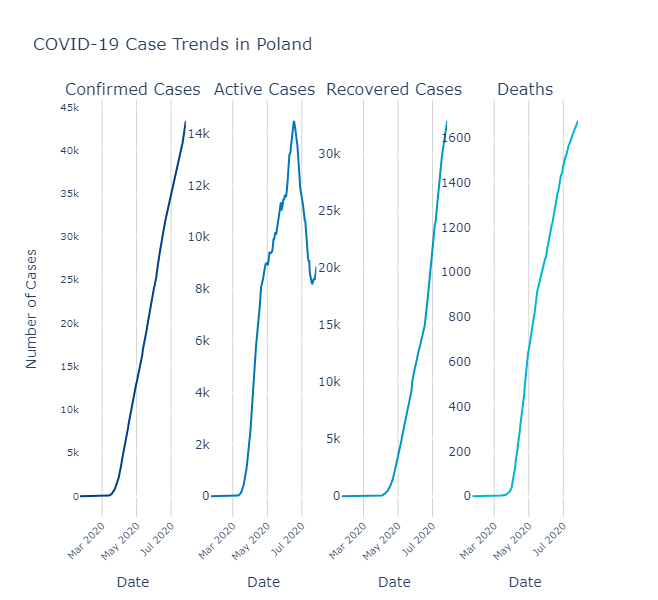

In [97]:
improved_country_visualization(group_data, 'Poland')

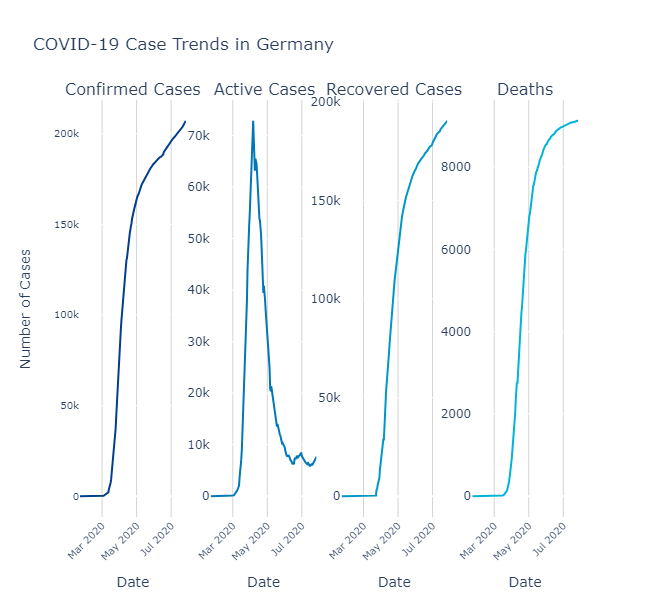

In [98]:
improved_country_visualization(group_data, 'Germany')

The comparative visualizations for Poland and Germany illustrate the trajectory of COVID-19 cases from March to July 2020. In Poland, confirmed cases show a steady increase, with a notable surge leading up to over 45,000. Active cases peaked and then declined significantly, suggesting effective management or reporting changes. Recoveries mirror the overall case trend, while deaths steadily increased to about 1,600, indicating a lower mortality rate relative to confirmed cases.

Germany's confirmed cases reached a higher peak over 200,000, but active cases drastically dropped, reflecting a robust recovery rate or a change in case management. Recovered cases reached up to 200,000, with a sharp increase in recoveries observed, which aligns with the drop in active cases. The death curve in Germany is more gradual, totaling around 8,000, which, against the high number of confirmed cases, showcases a relatively low death rate.

The data suggests Germany had a more significant outbreak but managed to control active cases and achieve higher recoveries compared to Poland. Both countries' death trends, while showing an increase, remained relatively low compared to their confirmed cases, highlighting effective health responses. These analyses provide crucial insights into each country's healthcare system effectiveness during the pandemic's first wave.

## Dissecting the Early Dynamics: Mortality, Recovery, and Containment in the Face of COVID-19

#### Mortality Rates and Healthcare System Efficacy:
The mortality rates across the top 20 affected countries, as seen in the provided "Top 20 Countries by Total COVID-19 Deaths" chart, show the USA leading with over 162,000 deaths, Brazil with about 98,644, and Mexico at approximately 50,517. These high numbers, particularly in the USA, may point to challenges in the healthcare system's capacity to manage the surge in cases. European nations like the UK and Italy had lower absolute numbers but high death-to-case ratios, suggesting a severe impact on their healthcare systems during the early outbreak. The varied mortality rates across these countries reflect differences in healthcare system preparedness, population health demographics, and the timeliness and effectiveness of the public health response.

#### Recovery Trends and Death-to-Case Ratio:
The recovery trends, highlighted by the "Top 20 Countries by Total Recovered COVID-19 Cases" chart, present the USA and Brazil as leaders in recoveries, with over 2.5 million and 2 million, respectively. India also shows a notable recovery count of 1.37 million. These figures, juxtaposed with the death-to-case ratio visualization, where countries like Yemen and France showed higher ratios (0.29 and 0.15, respectively), suggest that while the disease was severe, leading to high mortality in some nations, the overall global recovery rate was significant. This implies that clinical interventions were effective on a large scale, but certain countries faced more significant challenges, potentially due to strain on healthcare resources or differences in treatment efficacy.

#### Initial Spread and Peak in Poland and Germany:
The comparison of active cases in Poland and Germany indicates distinct trajectories. As seen from the "COVID-19 Case Trends in Poland and Germany" charts, Germany experienced a sharp peak and a rapid decline in active cases, reflecting effective early containment and testing strategies. Poland, on the other hand, had a more gradual increase and a delayed peak, which might suggest a slower response or different public health strategies. Germany's approach, including widespread testing and a swift lockdown, appears to have flattened the curve more effectively than Poland's, where the peak came later, suggesting a different timeline or set of containment measures.

## Concluding Insights and Future Directions: Navigating Through the Pandemic's Early Data Landscape

Our analysis of the early months of the COVID-19 pandemic revealed significant variances in the effectiveness of different countries' responses to the health crisis. The study highlighted the diverse outcomes of preventive actions, healthcare systems, and clinical interventions across the globe.

#### Key Findings:

- High mortality rates in certain countries underscore the need for further strengthening healthcare systems.
- Significant differences in infection dynamics between Poland and Germany underscore the importance of early preventive measures and testing.
- Global trends in the number of recovered cases provide valuable insights into the effectiveness of treatments and strategies for coping with the pandemic.

#### Further Research:
The impact of various factors, such as health policies, testing availability, and social behaviors, on the pandemic's development warrants continued analysis. Additionally, considering the evolving nature of the virus and the emergence of new variants, ongoing monitoring of trends and adjustment of response strategies are crucial.

#### Recommendations:

- Enhance global cooperation for knowledge and resource exchange.
- Invest in research on effective treatment methods and prevention.
- Continue promoting and encouraging behaviors that limit the virus's spread.
  
The analyzed data provide a basis for reflection on future actions that could help the world better prepare for similar health challenges. Lessons learned from the pandemic's initial months contribute valuable insights into global health crisis management.